In [1]:
%run run_test.py

c:\toxakaz\projects\2024\EM-algo\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 40/40 [01:13<00:00,  1.84s/it]


In [2]:
import sys
sys.path.insert(1, '../src')

# fmt: off

from scipy.stats import weibull_min, norm
from models import WeibullModelExp, GaussianModel, Model
from em import EM
import utils
from utils import *
from distribution import Distribution
import seaborn as sns
from typing import NamedTuple
import numpy as np
import time
from multiprocessing import Pool
import matplotlib.pyplot as plt
import random
import pandas as pd

# fmt: on

In [3]:
import pickle
from run_test import *

with open('results.pkl', 'rb') as f:
    results: list[TestResult] = pickle.load(f)

         name                                     params  prior_probability
0  WeibullExp  (2.685388016715966, -0.14443906392283976)                1.0


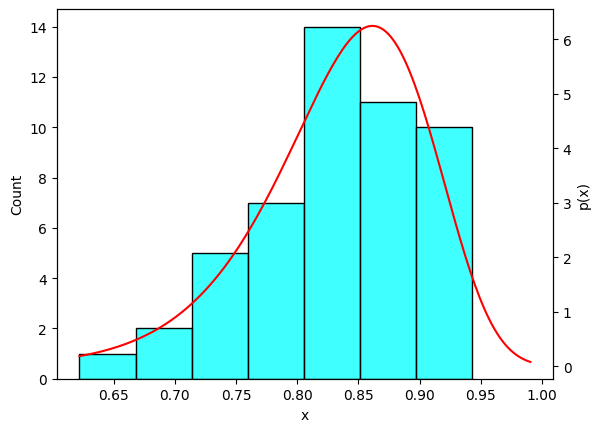



         name                                    params  prior_probability
0  WeibullExp  (2.684035303372985, -0.1498978417432616)                1.0


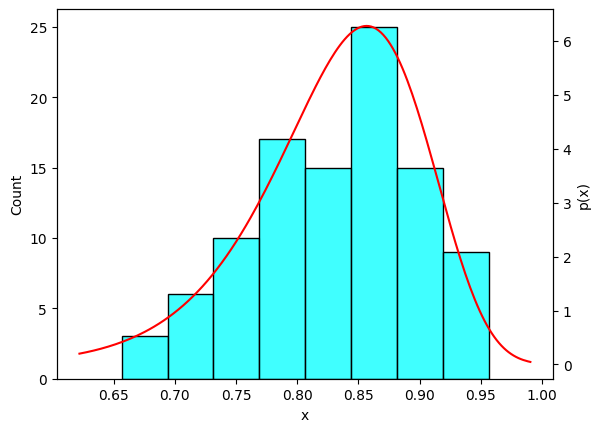



         name                                      params  prior_probability
0  WeibullExp  (2.7953903432462592, -0.14296993623945994)                1.0


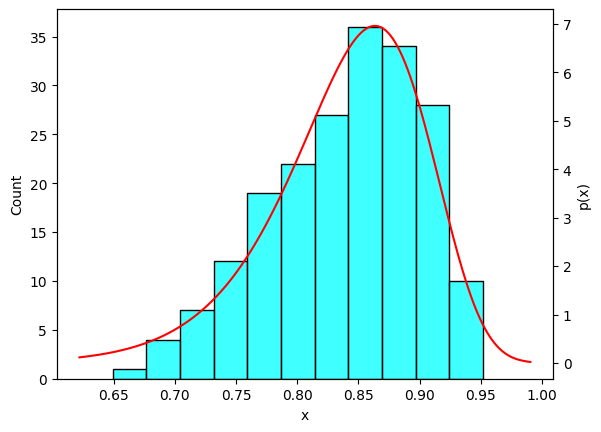



         name                                      params  prior_probability
0  WeibullExp  (2.7672256466436473, -0.14271834375607934)                1.0


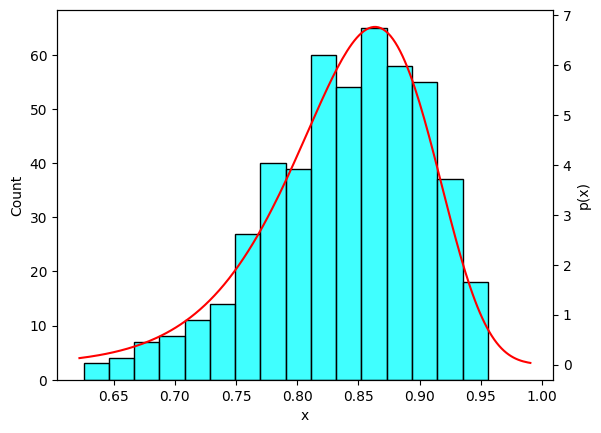



         name                                     params  prior_probability
0  WeibullExp  (2.5148990512722493, -0.9604819210370716)                0.5
1  WeibullExp   (1.950541553219994, -0.5090940909438949)                0.5


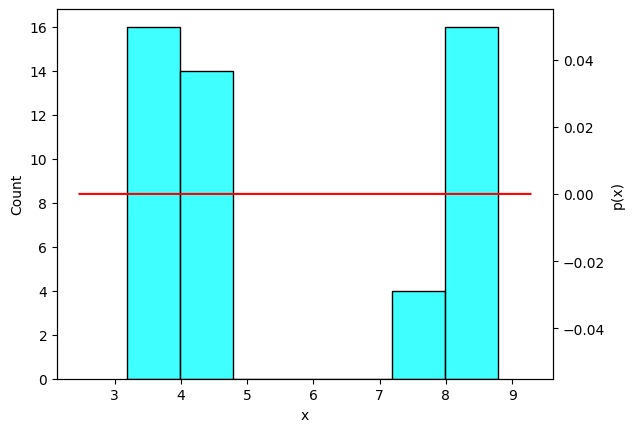



         name                                    params  prior_probability
0  WeibullExp    (2.8758602863686806, 2.10371205731705)           0.470029
1  WeibullExp  (2.6399797620767944, 1.3983054149306862)           0.529971


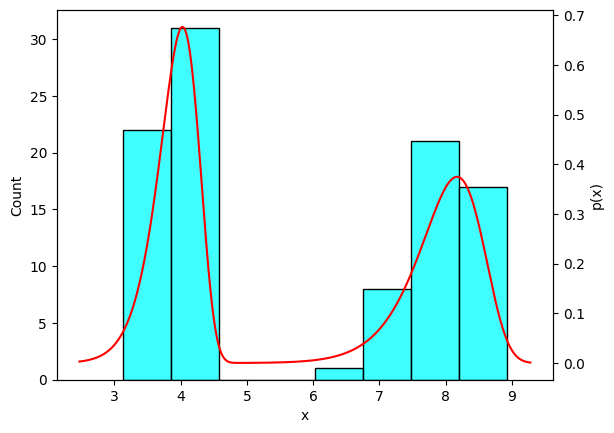



         name                                    params  prior_probability
0  WeibullExp  (2.5086567087855056, 1.3868949235205332)           0.454898
1  WeibullExp  (2.7334220553507143, 2.1019858255667097)           0.545102


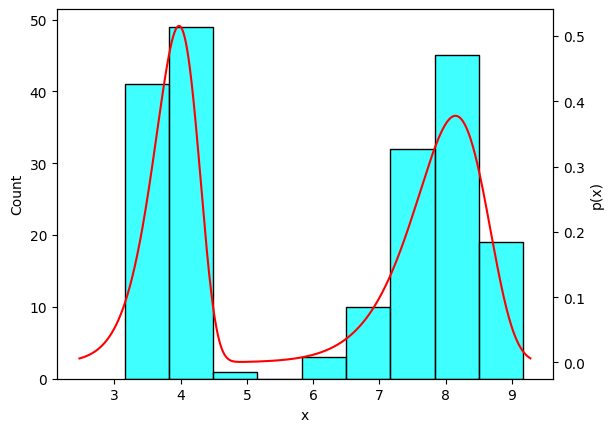



         name                                   params  prior_probability
0  WeibullExp  (2.7964505375141067, 2.114024766275908)           0.478033
1  WeibullExp    (2.5138834488158426, 1.3833074703908)           0.521967


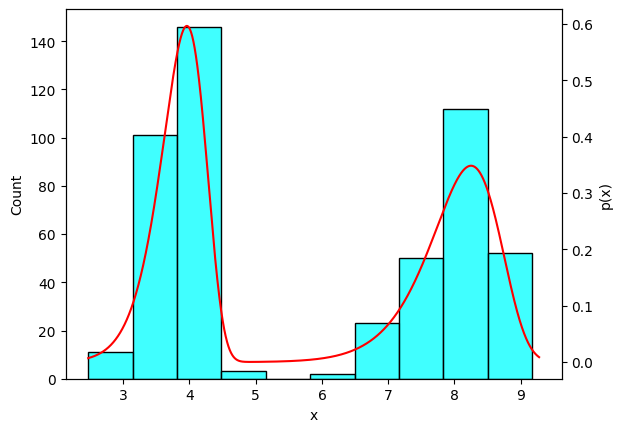



         name                                   params  prior_probability
0  WeibullExp  (2.110822764282604, 2.8960499767567116)                NaN
1  WeibullExp   (0.8205141563945495, 2.69289870193274)                NaN
2  WeibullExp  (46283.61091132664, -7402.649192912165)                NaN


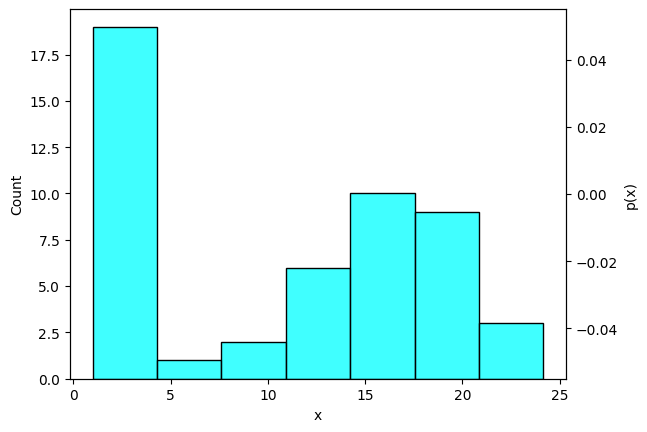



         name                                   params  prior_probability
0  WeibullExp  (1.6011533904919828, 2.934334980182375)           0.632010
1  WeibullExp  (2.783023749488551, 0.4030818156392977)           0.299212
2  WeibullExp  (1.3032197978207836, 1.798100170874833)           0.068777


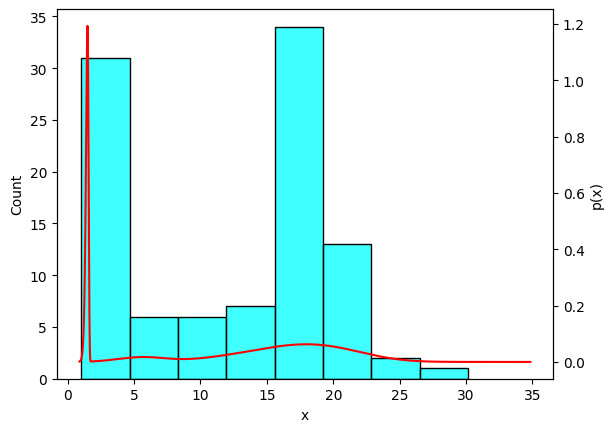



         name                                     params  prior_probability
0  WeibullExp  (1.8399966165012487, -0.9476881046723962)                NaN
1  WeibullExp  (2.7916487170332993, 0.43027507286197836)           0.939929
2  WeibullExp    (4.061926605894394, 0.2414375884536703)           0.060071


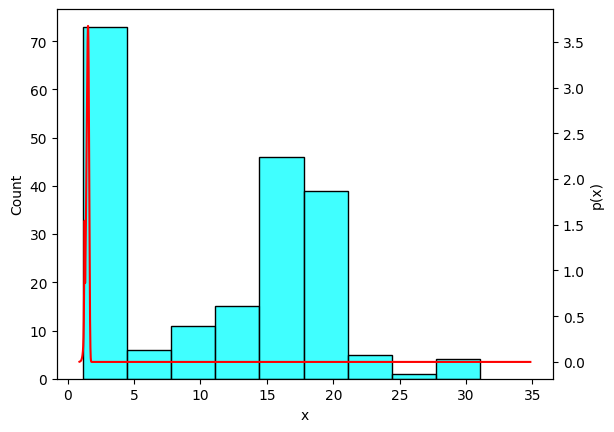



         name                                    params  prior_probability
0  WeibullExp  (2.6690920233993882, 0.4179573938398487)           0.322193
1  WeibullExp  (1.0632292420381588, 1.6862114745746961)           0.043224
2  WeibullExp  (1.4273187436748445, 2.9262108584181776)           0.634583


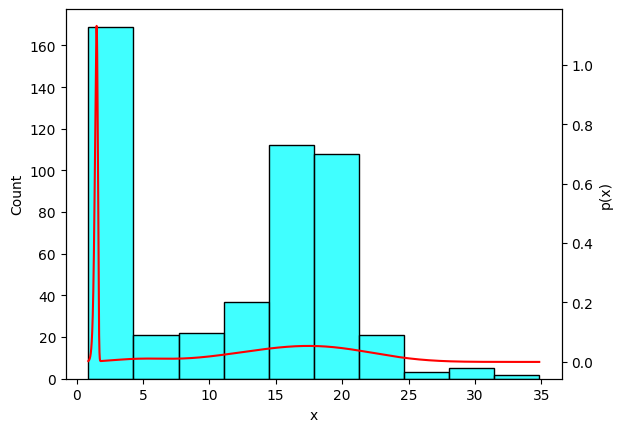



         name                                    params  prior_probability
0  WeibullExp  (14821.711620096994, -7013.972569181719)                NaN
1  WeibullExp  (3.1766585454729968, 2.3623120844340915)                NaN
2  WeibullExp   (3.9570023929710736, 2.399746076080827)                NaN
3  WeibullExp   (1.3288224165786457, 1.642811918089084)                NaN


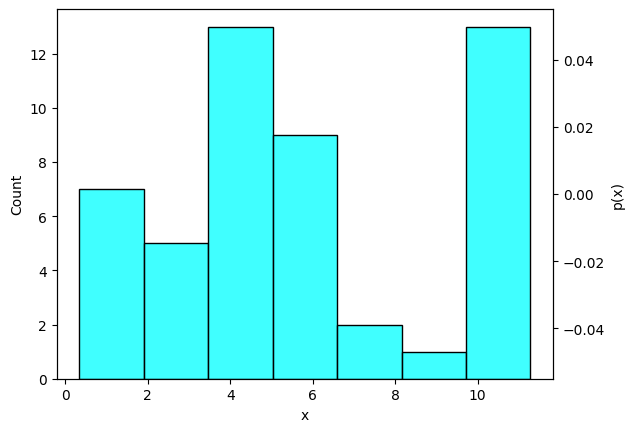



         name                                     params  prior_probability
0  WeibullExp  (2.3093748868142314, -1.0134519742107078)           0.229002
1  WeibullExp   (0.8652551052444963, 1.9494746534613834)           0.279306
2  WeibullExp    (0.858736879710208, 1.9281412669748148)           0.220002
3  WeibullExp   (0.8616482714225593, 1.9375116913966242)           0.271690


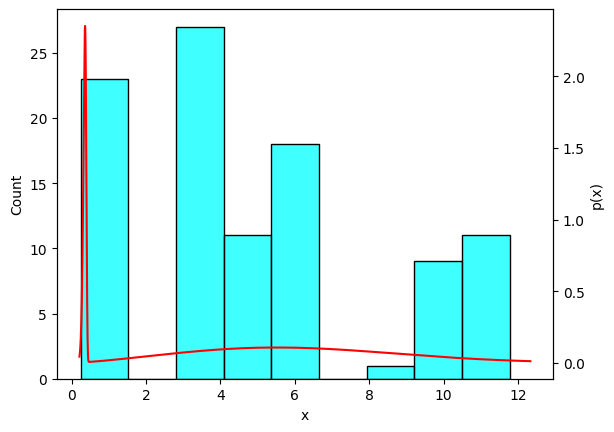



         name                                     params  prior_probability
0  WeibullExp    (1.197569773007561, 1.5366665413592624)                NaN
1  WeibullExp      (5549.38725986066, -460.415507599967)                NaN
2  WeibullExp    (1.5649292319051085, 2.314580481459577)                NaN
3  WeibullExp  (3.5168565434676564, -0.9856333236606846)                NaN


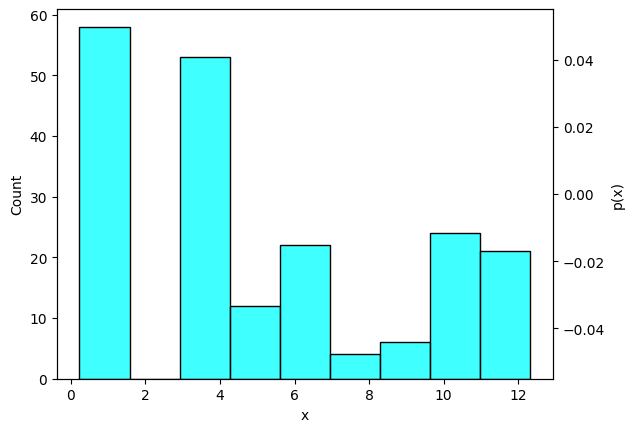



         name                                    params  prior_probability
0  WeibullExp   (2.9939760288218182, 1.275318307147212)           0.285055
1  WeibullExp  (1.9739518263228362, 1.7396056606000312)           0.224488
2  WeibullExp  (2.440239008593925, -0.9984199750820917)           0.262000
3  WeibullExp   (3.0088809139401236, 2.396129957508568)           0.228457


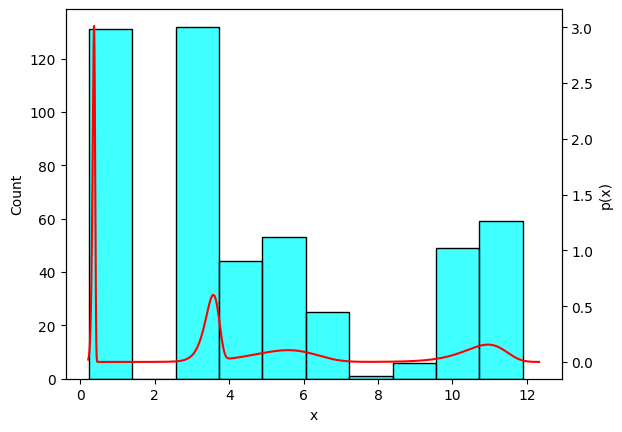



         name                                     params  prior_probability
0  WeibullExp    (2.028945174070971, 1.9702774365559745)           0.135295
1  WeibullExp   (3.3794343684387638, 2.8467943370452384)           0.050413
2  WeibullExp  (-0.14121936375538144, 2.866915104500654)           0.450583
3  WeibullExp    (3.0402275682665425, 1.480627807098196)           0.245972
4  WeibullExp   (3.1878895172531077, 0.3766277879543341)           0.117737


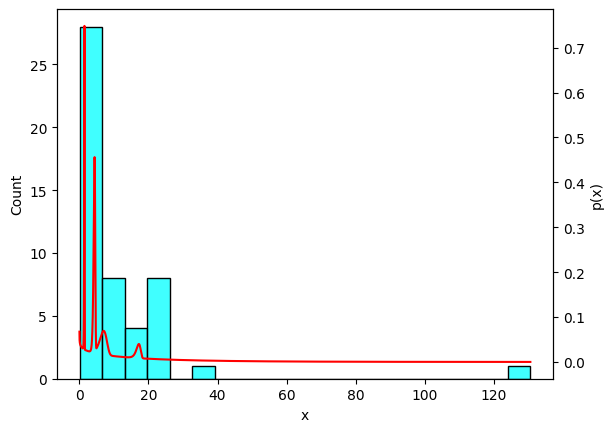



         name                                     params  prior_probability
0  WeibullExp  (2.7419129448009416, -0.7435614105637862)                NaN
1  WeibullExp  (1.3177697799218373, -0.9898906401260508)                NaN
2  WeibullExp  (2.7419129448009416, -0.7435614105637862)                NaN
3  WeibullExp  (1.3177697799218373, -0.9898906401260508)                NaN
4  WeibullExp  (2.7419129448009416, -0.7435614105637862)                NaN


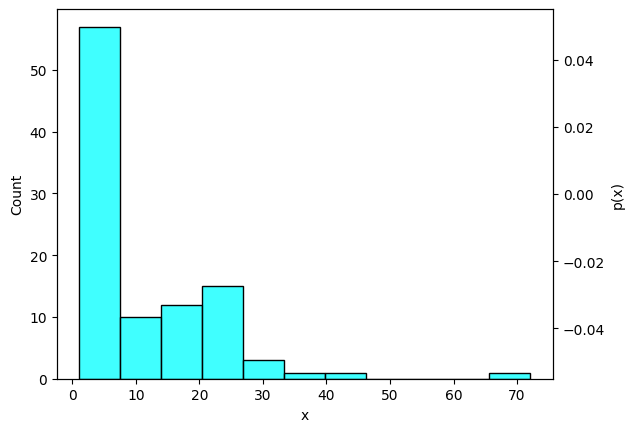



         name                                     params  prior_probability
0  WeibullExp    (2.8184418702103353, 1.492328625740587)           0.238492
1  WeibullExp     (2.472912953319219, 0.418737635239967)           0.151028
2  WeibullExp    (4.767142169290174, -1.345182040839158)           0.004922
3  WeibullExp  (0.25929194953452717, 2.7581608195158642)           0.533777
4  WeibullExp  (2.9148700721235983, 0.35798880159727436)           0.071781


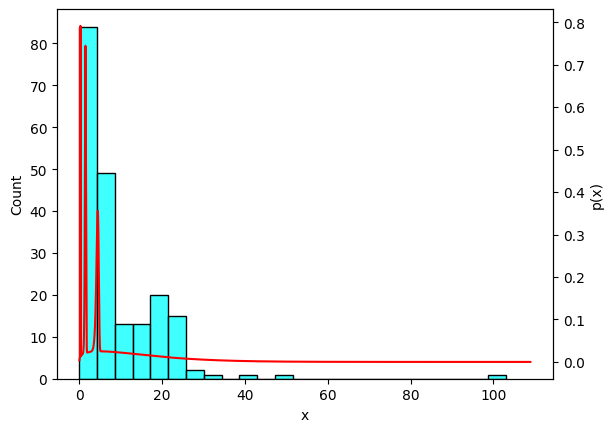



         name                                     params  prior_probability
0  WeibullExp   (1.3763489302306133, 2.9958764058934526)                NaN
1  WeibullExp  (-0.09158063893789493, 3.031407204960985)                NaN
2  WeibullExp  (13.867974691128428, -1.3465620011322998)                NaN
3  WeibullExp     (2.32549842750096, 1.5265942374902852)                NaN
4  WeibullExp  (0.47037814251345456, 1.0411775061364084)                NaN


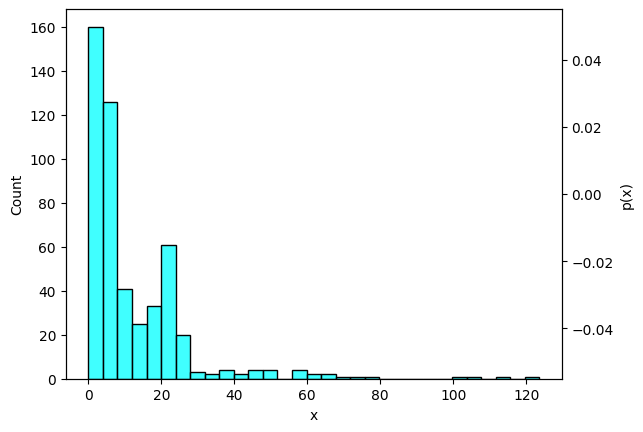



       name                                   params  prior_probability
0  Gaussian  (12.642451893250453, 2.672739931569174)                1.0


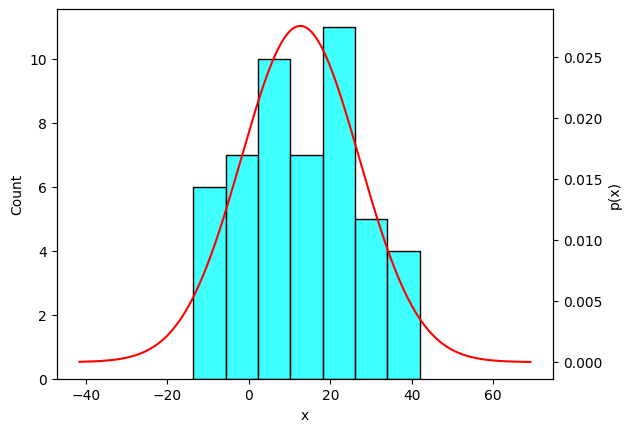



       name                                    params  prior_probability
0  Gaussian  (18.729179256111372, 2.8633213550129537)                1.0


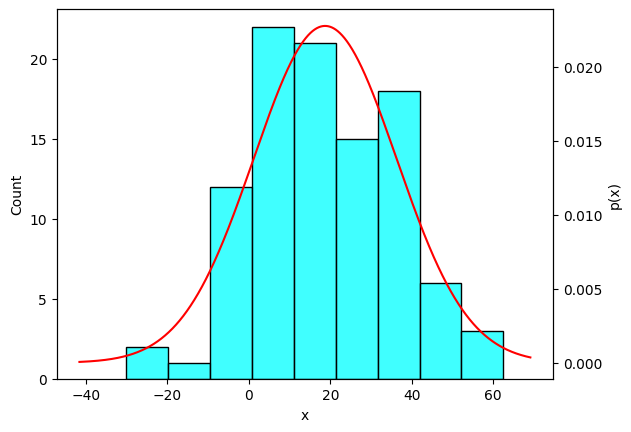



       name                                    params  prior_probability
0  Gaussian  (14.988932588253311, 2.8236003663242926)                1.0


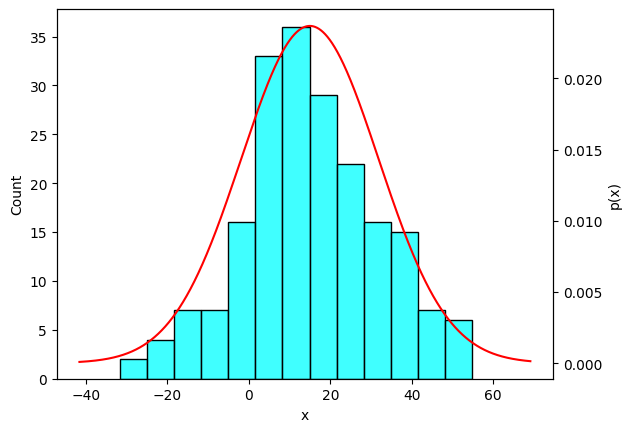



       name                                    params  prior_probability
0  Gaussian  (14.553395330474682, 2.8301939749749683)                1.0


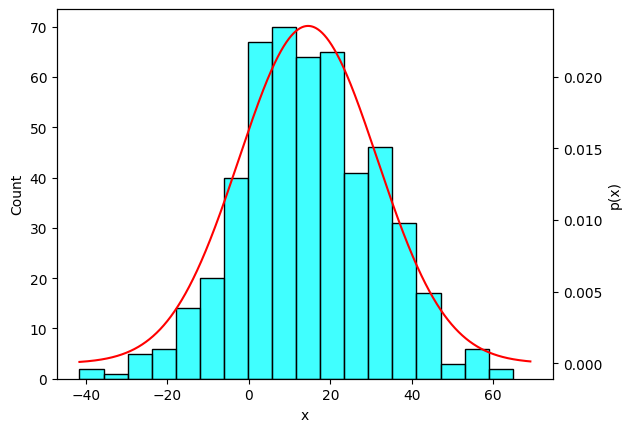



       name                                    params  prior_probability
0  Gaussian    (9.554996764567353, 2.616863482472827)            0.96244
1  Gaussian  (13.70229128798839, -1.6793376060129388)            0.03756


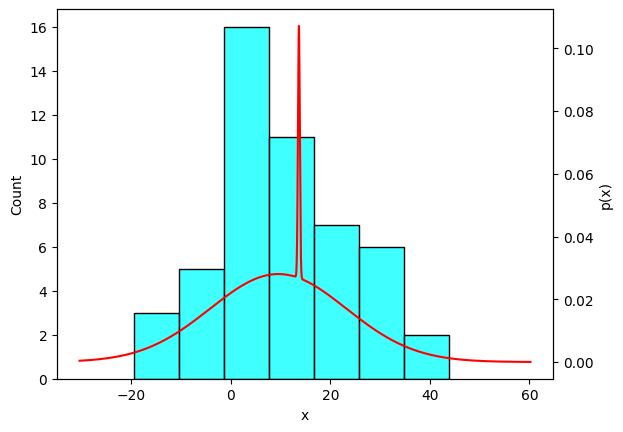



       name                                   params  prior_probability
0  Gaussian  (18.874924272359777, 2.632937294068543)           0.298765
1  Gaussian   (4.380865696861581, 2.421774912881156)           0.701235


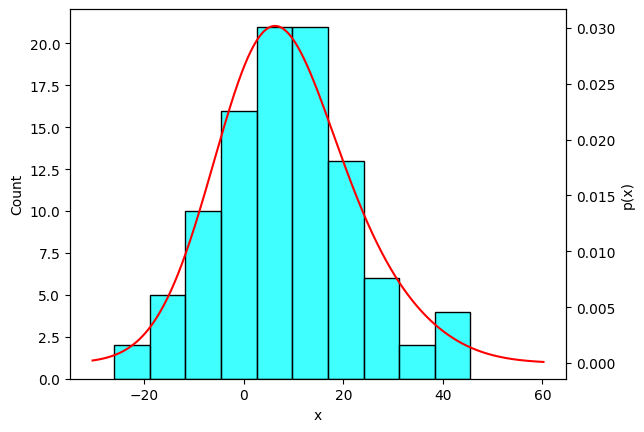



       name                                     params  prior_probability
0  Gaussian  (15.387938502772325, -1.8493317533353808)           0.015124
1  Gaussian    (10.59163351673837, 2.6146210803575527)           0.984876


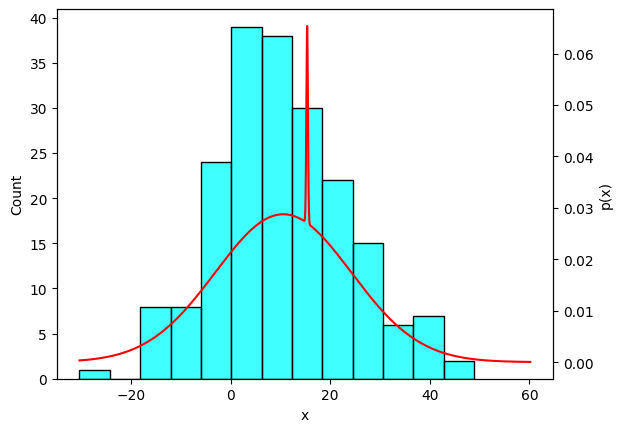



       name                                    params  prior_probability
0  Gaussian  (22.12635978358993, -0.3802230557011208)           0.010555
1  Gaussian  (10.648676976246882, 2.6703528115151736)           0.989445


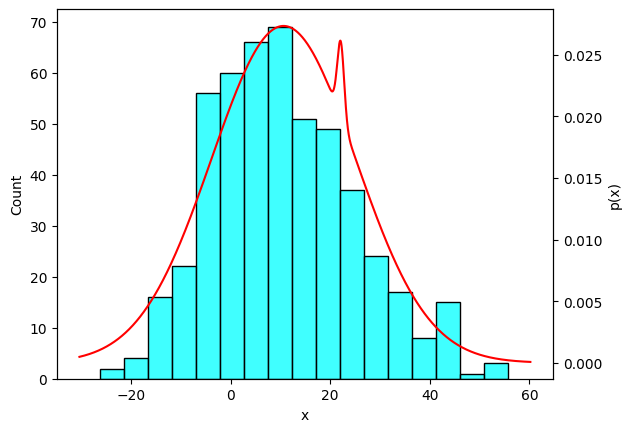



       name                                    params  prior_probability
0  Gaussian  (33.091631456501126, 1.0030320839115403)           0.098212
1  Gaussian   (5.789334744183098, 0.4437168718845655)           0.232652
2  Gaussian  (17.647211377257875, 3.2362632759633554)           0.669137


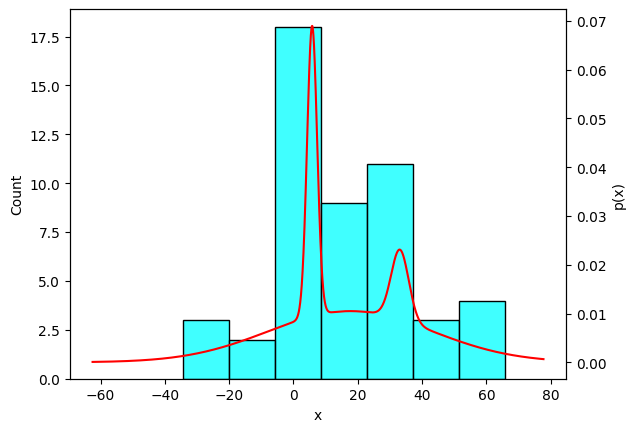



       name                                      params  prior_probability
0  Gaussian      (9.401349272382493, 3.154189304740254)           0.779179
1  Gaussian  (18.54003266674055, -0.043238195467129224)                NaN
2  Gaussian    (7.7683248298669145, 0.7417774623224688)           0.220821


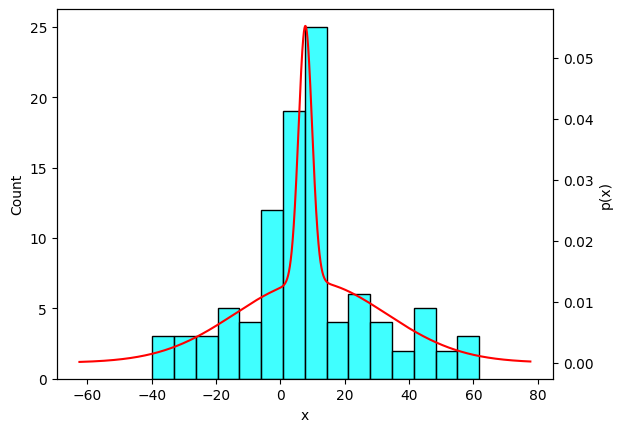



       name                                     params  prior_probability
0  Gaussian   (11.274423685695682, 3.0710675531335037)           0.744989
1  Gaussian    (7.021861578688178, 1.0234309643441057)           0.227540
2  Gaussian  (13.499771344782953, -1.2343261757441248)           0.027472


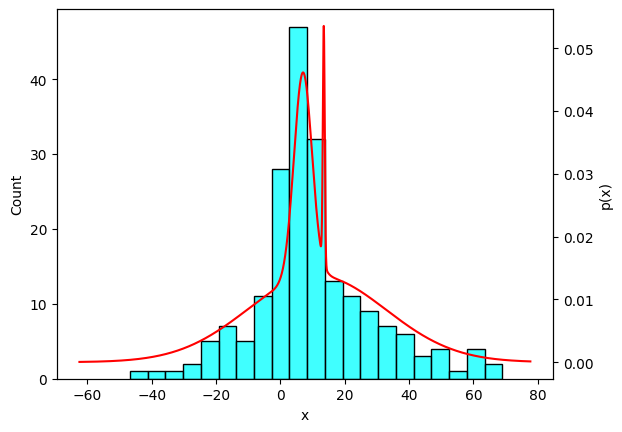



       name                                     params  prior_probability
0  Gaussian     (6.898703770540368, 1.422889758349395)           0.369512
1  Gaussian  (24.941792072016646, -0.9419566365705454)           0.007904
2  Gaussian    (15.220162577435444, 3.143101378631444)           0.622585


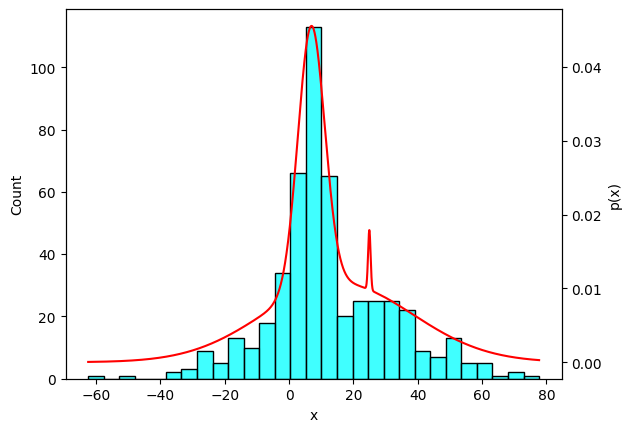



       name                                     params  prior_probability
0  Gaussian   (5.070748413649834, -0.1735898897785764)           0.159423
1  Gaussian  (13.922718100110647, -0.3668948042021341)           0.075291
2  Gaussian  (17.778582466332747, -0.8593869195914388)           0.070144
3  Gaussian    (8.697636771240157, 2.6177397976802355)           0.695141


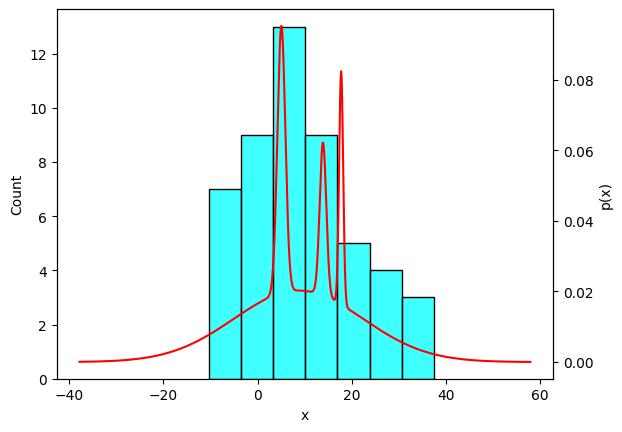



       name                                     params  prior_probability
0  Gaussian  (17.32728903021176, -0.03841398282707382)           0.031727
1  Gaussian    (12.248232793257962, 2.684081830651083)           0.487856
2  Gaussian   (6.205768471390968, -1.8678212293901695)           0.004641
3  Gaussian   (12.332928897591207, 2.6850760824598283)           0.475776


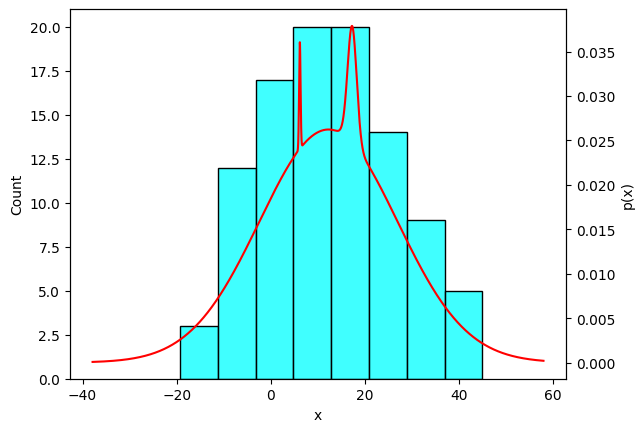



       name                                    params  prior_probability
0  Gaussian  (24.713755292648717, 1.8036527948028949)           0.122995
1  Gaussian  (5.006050494686342, -0.8326358071061651)           0.038449
2  Gaussian    (8.442091404301335, 2.756819743882679)           0.796800
3  Gaussian   (15.74188850917486, 0.6557002898130466)           0.041756


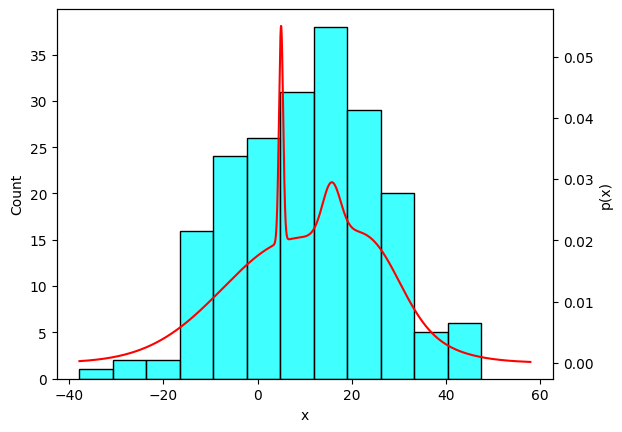



       name                                      params  prior_probability
0  Gaussian    (3.1843992369204375, 1.9746225087972629)           0.064246
1  Gaussian    (16.113601589267255, 0.8983505828639669)           0.047134
2  Gaussian  (25.236624161438783, -0.44624507898403637)           0.008019
3  Gaussian     (12.273991341500375, 2.742064112461612)           0.880600


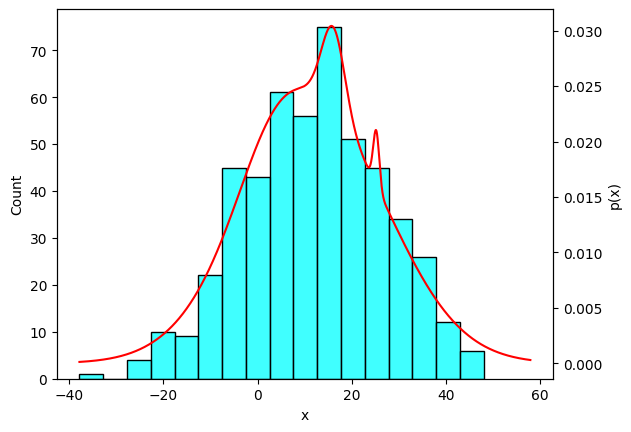



       name                                    params  prior_probability
0  Gaussian  (13342.033439198447, -1123587.260203731)                NaN
1  Gaussian  (16.454439077954177, 2.8660593480550727)                NaN
2  Gaussian   (10.745943823800522, 1.391397585208204)                NaN
3  Gaussian   (17.09469646598927, 1.0891426833937083)                NaN
4  Gaussian  (2.947643403323124, 0.04939273775325814)                NaN


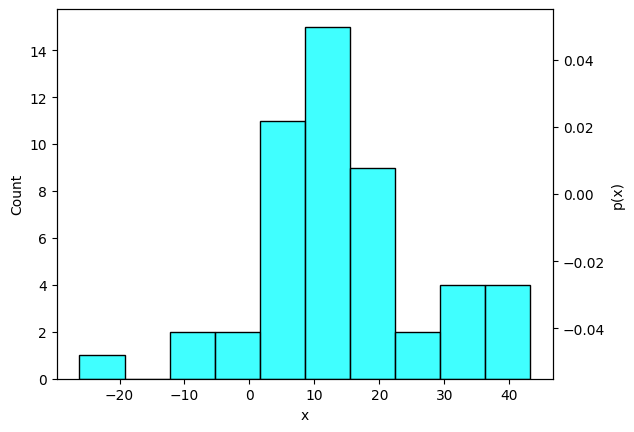



       name                                     params  prior_probability
0  Gaussian   (16.178798063610966, 2.8950256470743305)           0.637983
1  Gaussian     (9.400749490799706, 1.169608680089573)           0.254590
2  Gaussian  (20.144027071893536, 0.45751680089388996)           0.069702
3  Gaussian  (18.902385956570004, -0.4684959944395477)           0.022119
4  Gaussian   (16.274668753872657, -2.846036343822121)           0.015607


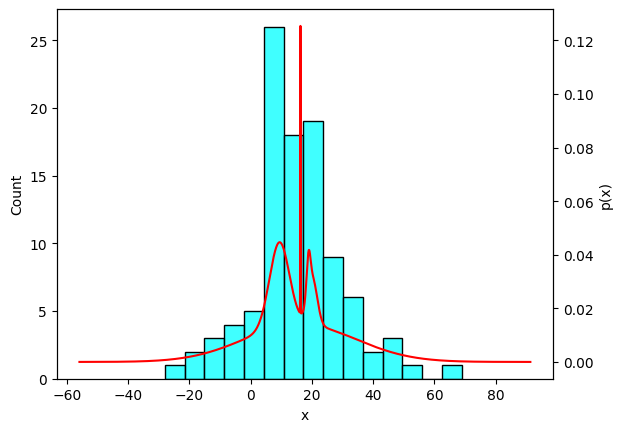



       name                                     params  prior_probability
0  Gaussian  (25.723110470667397, -1.8952804975028155)           0.019398
1  Gaussian    (16.136975419651897, 1.042108004795125)           0.041187
2  Gaussian    (14.102258342070611, 2.875762140227381)           0.608942
3  Gaussian   (10.440573441034141, 1.0314041792962987)           0.238676
4  Gaussian    (22.23018286569227, 1.6392739499220386)           0.091797


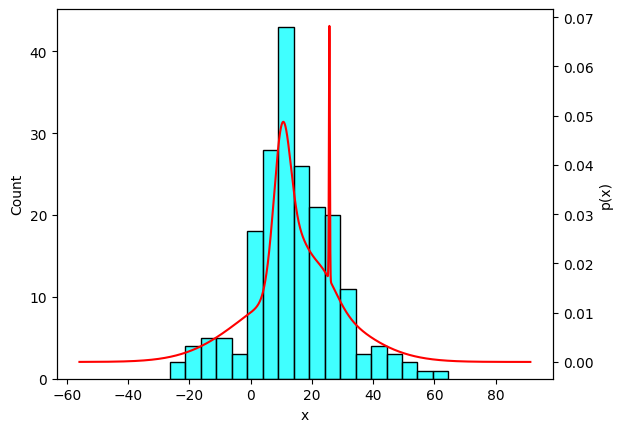



       name                                    params  prior_probability
0  Gaussian   (10.269447079019379, 0.843227346860786)           0.215469
1  Gaussian   (4.766292535185274, -1.301606677332641)           0.021678
2  Gaussian   (13.948533520522108, 2.862296528476837)           0.650736
3  Gaussian  (22.050826814439933, 0.9722732507167353)           0.067706
4  Gaussian  (13.98810196832774, -0.9169995623962179)           0.044411


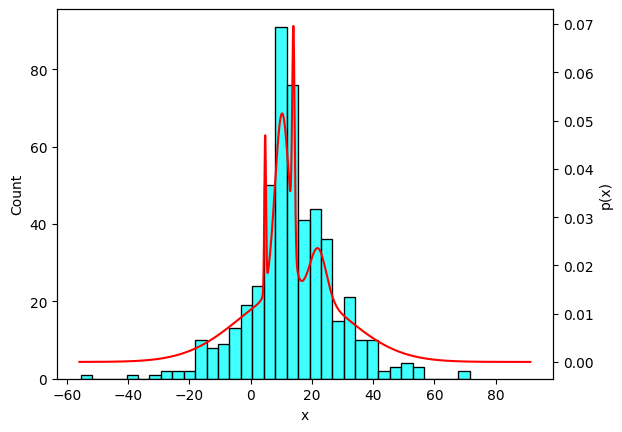

In [4]:
results.sort(key=lambda t: t.test.number)

for result in results:

    table = [
        [d.model.name(), tuple(d.params), d.prior_probability]
        for d in result.result.distributions
    ]
    df = pd.DataFrame(table, columns=["name", "params", "prior_probability"])
    print(df)

    fig, ax1 = plt.subplots()
    ax1.set_xlabel("x")

    sns.histplot(result.test.data, color="cyan")
    ax2 = ax1.twinx()
    ax2.set_ylabel("p(x)")

    min_data = min(result.test.base_data)
    max_data = max(result.test.base_data)

    def p(x):
        s = 0
        for d in result.result.distributions:
            if d.prior_probability is not None:
                s += d.prior_probability * d.model.p(x, d.params)
        return s

    X = list(np.linspace(min_data, max_data, int(np.abs(max_data - min_data) * 512)))
    Y = [p(x) for x in X]
    ax2.plot(X, Y, color="red")
    plt.show()
    print()
    print()